<a href="https://colab.research.google.com/github/huzaifa003/skin_disease_identification/blob/master/GPT_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (244 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq langchain==0.0.173 --progress-bar off
!pip install -qqq chromadb==0.3.23 --progress-bar off
!pip install -qqq pypdf==3.8.1 --progress-bar off
!pip install -qqq pygpt4all==1.1.0 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
!gdown 1DpFisoGXsQbpQJvijuvxkLW_pg-FUUMF

Downloading...
From: https://drive.google.com/uc?id=1DpFisoGXsQbpQJvijuvxkLW_pg-FUUMF
To: /content/ms-financial-statement.pdf
100% 29.1k/29.1k [00:00<00:00, 46.0MB/s]


In [ ]:
!wget https://gpt4all.io/models/ggml-gpt4all-j-v1.3-groovy.bin

--2024-04-02 18:48:31--  https://gpt4all.io/models/ggml-gpt4all-j-v1.3-groovy.bin
Resolving gpt4all.io (gpt4all.io)... 172.67.71.169, 104.26.0.159, 104.26.1.159, ...
Connecting to gpt4all.io (gpt4all.io)|172.67.71.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3785248281 (3.5G)
Saving to: ‘ggml-gpt4all-j-v1.3-groovy.bin’

ggml-gpt4all-j-v1.3 100%[===================>]   3.52G  24.2MB/s    in 2m 58s  

2024-04-02 18:51:29 (20.3 MB/s) - ‘ggml-gpt4all-j-v1.3-groovy.bin’ saved [3785248281/3785248281]



In [ ]:
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import GPT4All
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images = convert_from_path("Derm.pdf", dpi=88)
len(images)

79

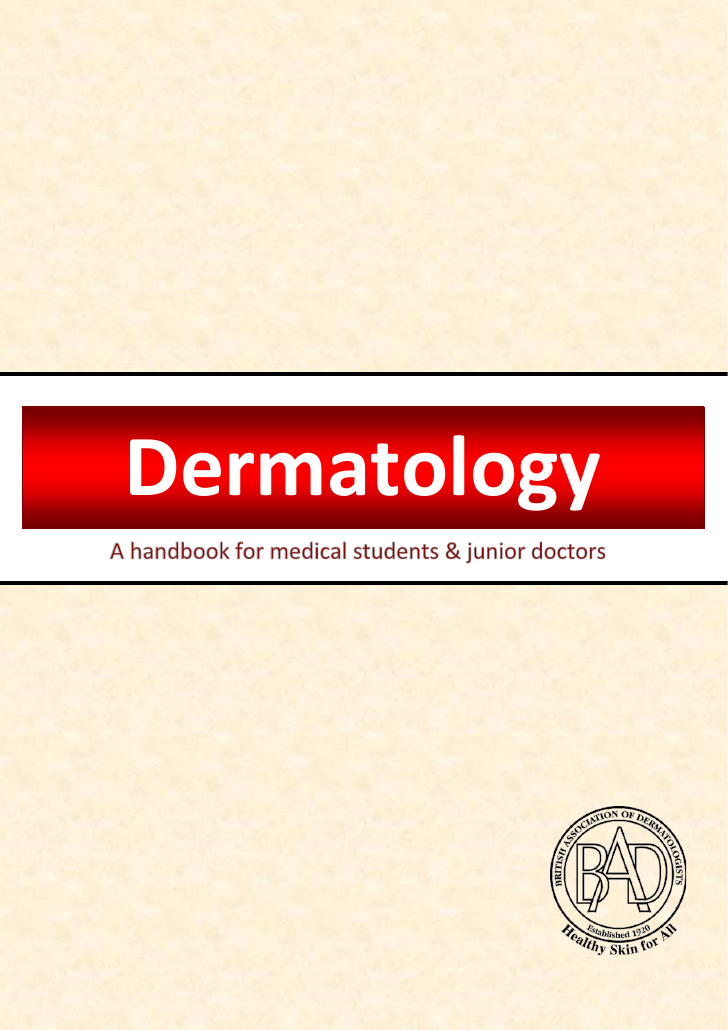

In [ ]:
images[0]

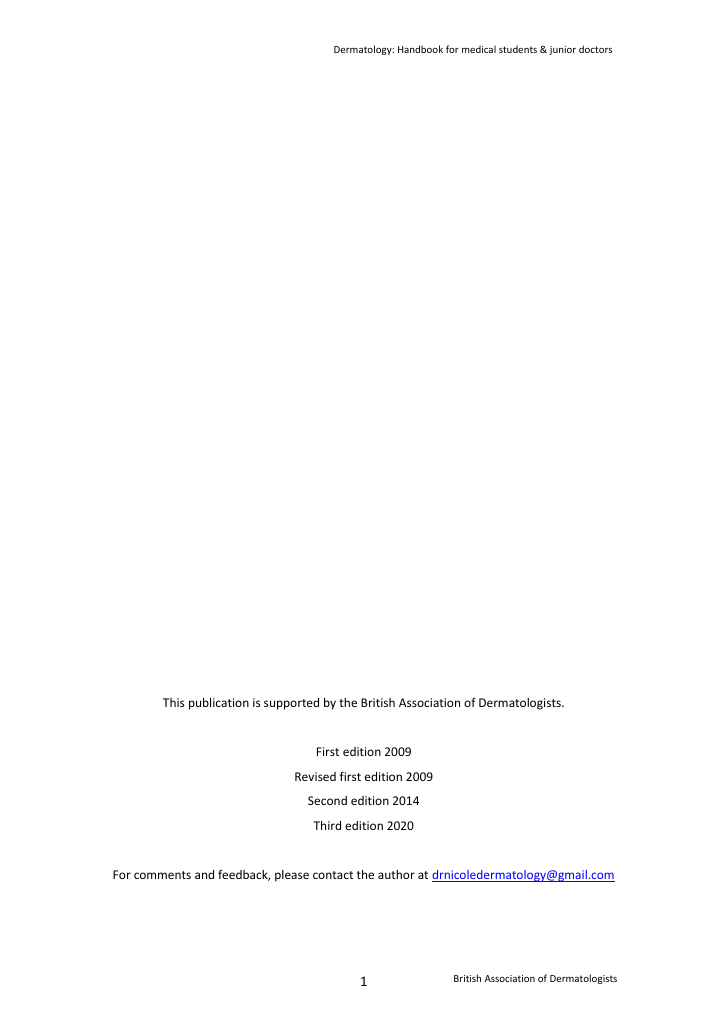

In [ ]:
images[1]

## Load Data

In [ ]:
loader = PyPDFLoader("Derm.pdf")

In [ ]:
documents = loader.load_and_split()

In [ ]:
len(documents)

78

In [ ]:
print(documents[5].page_content)

Dermatology : Handbook for m edical students & junior d octors   
   British Association of Dermatologists  5  
 
 
 
 
11 years have passed since this Handbook first appeared. It has proved immensely popular 
and it ha s been further updated . We hope that it will continue to be a valuable source book 
for those interested in learning about this exciting specialty.  The Handbook was designed to 
be an overview , both succinct and reader -friendly which continues to be our aim.  
Once again,  many thanks to the BAD for its essential and continuing support.  
Julian  Verbov  
Professor of Dermatology  Liverpool 2020  
 
 
 
Past BAD President Dr Mark Goodfield wrote in the first edition:  
‘There is a real need for appropriate information about dermatological diseases to meet the 
educational needs of doctors at all levels.’  
 
This holds true even more today than in 2009 with the exponential use of social media as an 
information sourced by patients and clinicians alike. Since its fir

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(documents)

In [ ]:
len(texts)

133

In [ ]:
print(texts[20].page_content)

Dermatology : Handbook for m edical students & junior d octors   
   British Association of Dermatologists  12 Discoid  / A coin -shaped/round lesion  
Nummular  Example:  Discoid eczema  
    
 
 
Table 6. Colour  
Term s  Meaning        
Erythema  Redness  (due to inflammation and vasodila tation)  which blanches on 
pressure  
Example:  
 
 
Purpura  Red or purple colour  (due to bl eeding into the skin or mucous membrane)   
which  does not blanch on pressure  – petechiae (small pinpoint macules) and   
ecchymoses  (larger bruise -like patches)   
Example:  
Hypopigmentation of discoid 
lupus  
Palmar erythema    Essential Clinical Skills  – Communicating examination findings


## Create Embeddings

In [ ]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

## Create Chain

In [ ]:
model_n_ctx = 1000
model_path = "./ggml-gpt4all-j-v1.3-groovy.bin"
llm = GPT4All(model=model_path, n_ctx=1000, backend="gptj", verbose=False)

In [ ]:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 3}),
    return_source_documents=True,
    verbose=False,
)

## Ask Questions

In [ ]:
%%time
res = qa(
    "What are dermatology problems? Extract from text"
)

CPU times: user 36min 55s, sys: 13.2 s, total: 37min 8s
Wall time: 22min 4s


In [ ]:
res

{'query': 'What are dermatology problems?',
 'result': ' Dermatology problems are conditions that affect the skin, hair, nails, and mucous membranes. They can be caused by a variety of factors, such as genetics, environmental factors, and underlying medical conditions. Some common dermatology problems include acne, psoriasis, eczema, and warts.',
 'source_documents': [Document(page_content='Dermatology : Handbook for m edical students & junior d octors   \n     British Association of Dermatologists', metadata={'source': 'Derm.pdf', 'page': 77}),
  Document(page_content='competent assessment of patients presenting with skin disorders (available on: \nhttps://www.bad.org.uk/shared/get -file.ashx?itemtype=document&id=4168 ) \n \n• This handbook addresses these learning outcomes and aims to equip you with the \nknowledge and skills to practise competently and safely as a junior doctor.  \n \n \n \n What is dermatology?  \nWhy is dermatology important?  \nWhat is this handbook about?', meta

In [ ]:
print(res["result"])

 Dermatology problems are conditions that affect the skin, hair, nails, and mucous membranes. They can be caused by a variety of factors, such as genetics, environmental factors, and underlying medical conditions. Some common dermatology problems include acne, psoriasis, eczema, and warts.


In [ ]:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 1}),
    return_source_documents=True,
    verbose=False,
)

In [ ]:
%%time
res = qa(
    "Cause of Staphylococcal scalded skin syndrome? Extract in text"
)

CPU times: user 15min 17s, sys: 5.6 s, total: 15min 22s
Wall time: 9min 11s


In [ ]:
print(res["result"])

 Staphylococcal scalded skin syndrome is caused by the bacterium Staphylococcus aureus.


## References

- [GPT4All](https://gpt4all.io/)
- [MICROSOFT 2022 ANNUAL REPORT](https://www.microsoft.com/investor/reports/ar22/download-center/)